<a href="https://colab.research.google.com/github/janairacs/challenge2-data-science-TelecomX/blob/main/Projeto_TelecomX_BR_Janaira_Casotti_de_Souza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Projeto: Análise de Evasão de Clientes - Telecom X
# Autor: Janaira Casotti de Souza

#1. Extração de Dados
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# URL da API (arquivo JSON)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Requisição dos dados
response = requests.get(url)
data = response.json()

# Criação do DataFrame
df_raw = pd.DataFrame(data)
print("Dados carregados com sucesso!\n")
print(df_raw.head())


Dados carregados com sucesso!

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber o

In [2]:
#2. Transformação e Normalização

# Normalização de colunas aninhadas
df = pd.json_normalize(df_raw.to_dict(orient="records"))

# Exibir colunas disponíveis e tipos
print("\n Colunas disponíveis:")
print(df.columns.tolist())

print("\n Tipos de dados:")
print(df.dtypes)



 Colunas disponíveis:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

 Tipos de dados:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection    

In [3]:
#3. Limpeza e Tratamento

# Tratamento de tipos numéricos
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Converter a coluna alvo 'Churn' em binária
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verificar valores ausentes
print("\n Valores nulos por coluna:")
print(df.isnull().sum())

# Eliminar duplicatas (se houver)
df.drop_duplicates(inplace=True)


 Valores nulos por coluna:
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


In [4]:
 #4. Análise Descritiva

 # Estatísticas gerais
print("\n Estatísticas descritivas:")
print(df.describe())


 Estatísticas descritivas:
             Churn  customer.SeniorCitizen  customer.tenure  \
count  7043.000000             7267.000000      7267.000000   
mean      0.265370                0.162653        32.346498   
std       0.441561                0.369074        24.571773   
min       0.000000                0.000000         0.000000   
25%       0.000000                0.000000         9.000000   
50%       0.000000                0.000000        29.000000   
75%       1.000000                0.000000        55.000000   
max       1.000000                1.000000        72.000000   

       account.Charges.Monthly  account.Charges.Total  
count              7267.000000            7256.000000  
mean                 64.720098            2280.634213  
std                  30.129572            2268.632997  
min                  18.250000              18.800000  
25%                  35.425000             400.225000  
50%                  70.300000            1391.000000  
75%         

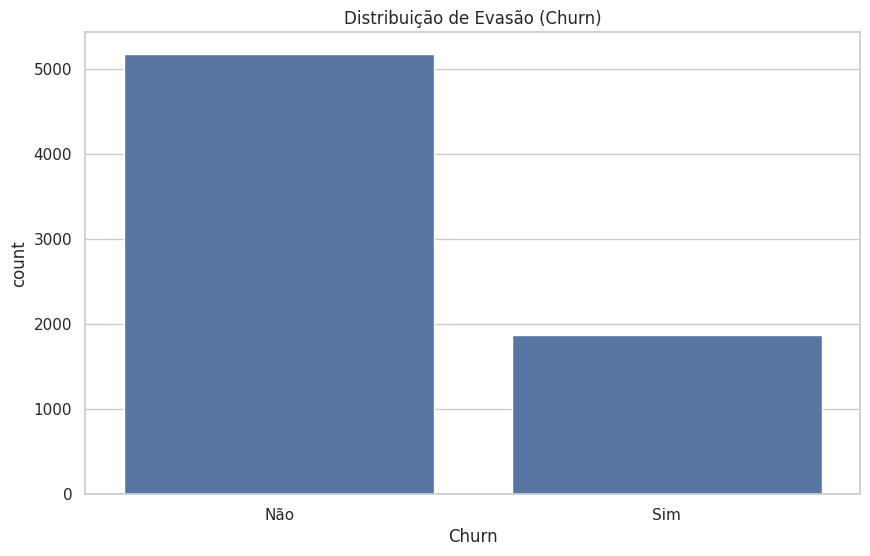

In [ ]:
#5. Análise de Evasão (Churn)

#5.1 Distribuição de Churn
sns.countplot(data=df, x='Churn')
plt.title("Distribuição de Evasão (Churn)")
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()



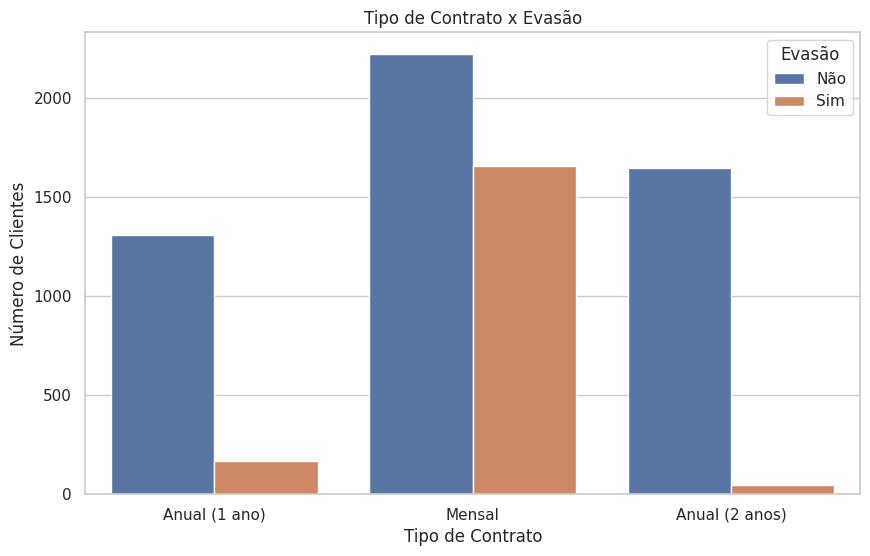

In [ ]:
# 5.2 Contrato vs Churn
# Mapeamento dos tipos de contrato para português
mapa_contratos = {
    'Month-to-month': 'Mensal',
    'One year': 'Anual (1 ano)',
    'Two year': 'Anual (2 anos)'
}

# Criar uma nova coluna com os nomes traduzidos
df['ContratoTraduzido'] = df['account.Contract'].map(mapa_contratos)

# Plot do gráfico com os nomes em português
sns.countplot(data=df, x='ContratoTraduzido', hue='Churn')
plt.title("Tipo de Contrato x Evasão")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.legend(title="Evasão", labels=["Não", "Sim"])
plt.show()


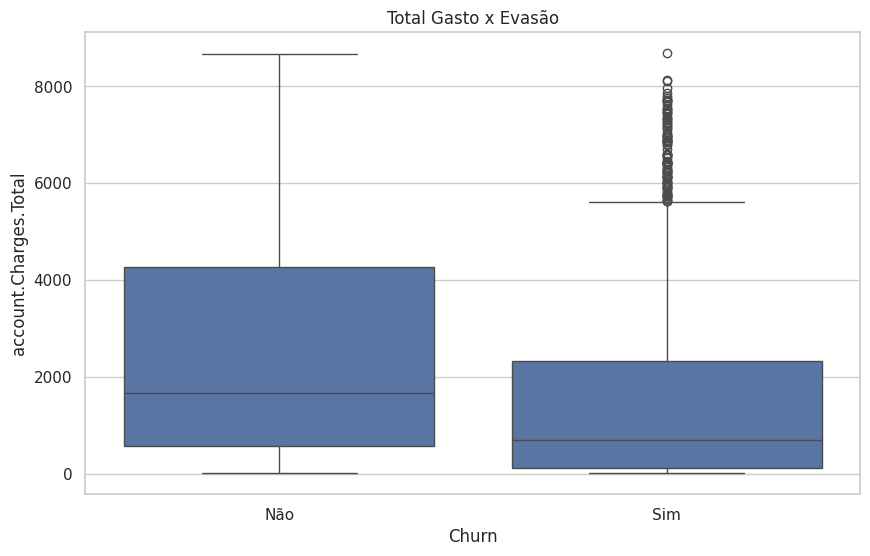

In [ ]:
#5.3 Total Gasto vs Churn
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title("Total Gasto x Evasão")
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()



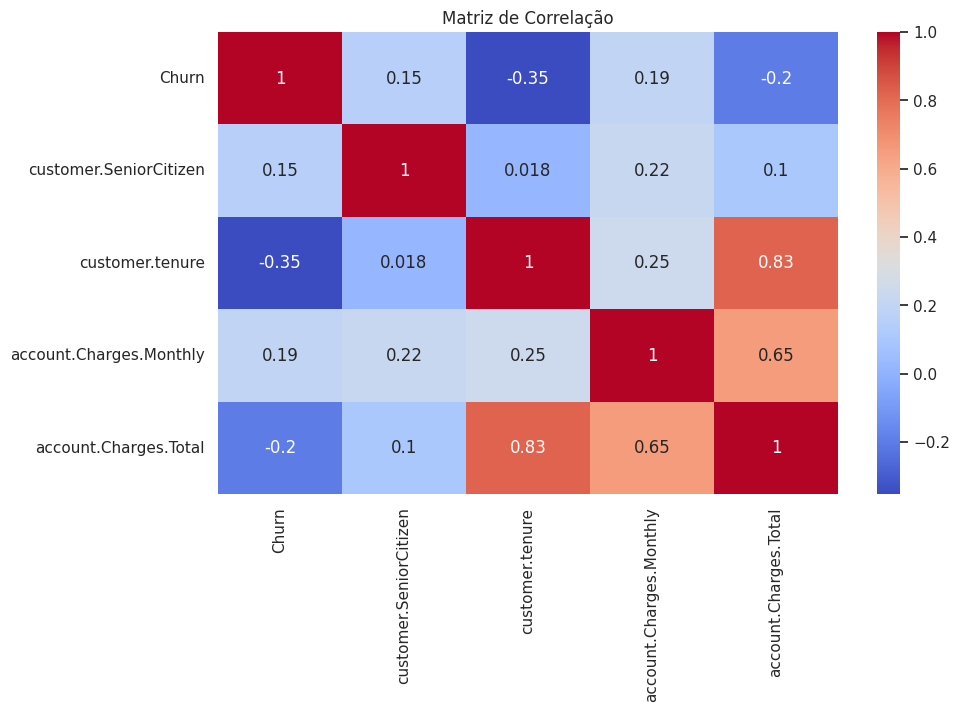

In [ ]:
#6. Correlação entre Variáveis

# Correlação apenas com variáveis numéricas
correlation = df.corr(numeric_only=True)

# Mapa de calor
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


In [5]:
#7. Relatório Final - Conclusões e Insights

# Conclusões exemplo:
print(""" Conclusões e Insights:
- Clientes com contratos mensais têm maior probabilidade de evasão.
- Há correlação negativa moderada entre 'account.Charges.Total' e 'Churn'.
- Planos com mais tempo de fidelidade tendem a reter melhor os clientes.

 Recomendações:
- Incentivar migração de clientes de planos mensais para planos anuais.
- Investigar motivos de evasão entre clientes com baixo gasto total.
- Avaliar campanhas de retenção personalizadas por perfil de uso.
""")

 Conclusões e Insights:
- Clientes com contratos mensais têm maior probabilidade de evasão.
- Há correlação negativa moderada entre 'account.Charges.Total' e 'Churn'.
- Planos com mais tempo de fidelidade tendem a reter melhor os clientes.

 Recomendações:
- Incentivar migração de clientes de planos mensais para planos anuais.
- Investigar motivos de evasão entre clientes com baixo gasto total.
- Avaliar campanhas de retenção personalizadas por perfil de uso.

